In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
X = dataset.iloc[:, [3, 4]].values

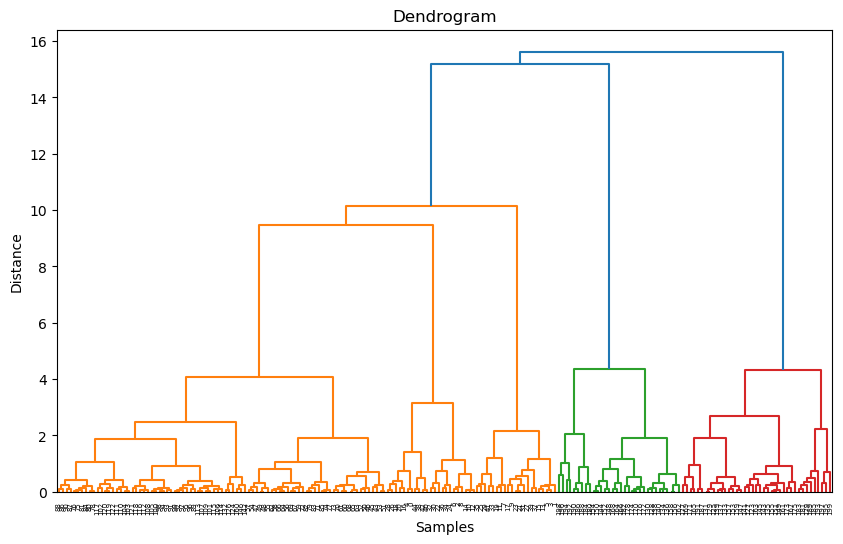

In [5]:
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
n_clusters = 5  # Choose the number of clusters based on the dendrogram
agglo = AgglomerativeClustering(n_clusters=n_clusters)
y_agglo = agglo.fit_predict(X_scaled)

In [8]:
supervised = dataset.copy()
supervised['Cluster_group'] = y_agglo

In [9]:
supervised.to_csv("cluster_spectral.csv", index=False)

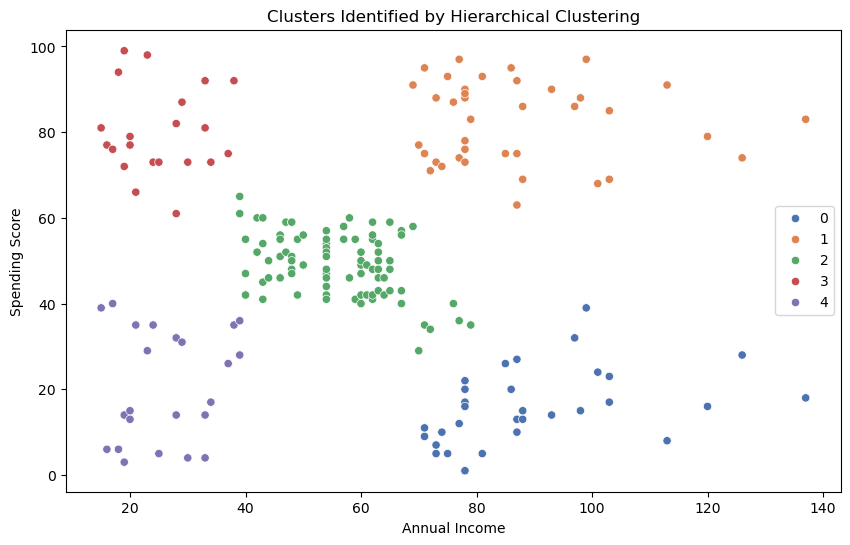

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue='Cluster_group', palette='deep')
plt.title('Clusters Identified by Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()